In [1]:
import matplotlib.pylab as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2025-12-11 15:10:19.846165: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-11 15:10:19.858313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-11 15:10:19.871613: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-11 15:10:19.875630: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-11 15:10:19.885822: I tensorflow/core/platform/cpu_feature_guar

In [2]:
df = pd.read_csv("diabetes.csv")
df.columns = ['임신 횟수', '포도당 농도', '혈압', '피부 두께', '인슐린', 'BMI', '당뇨병 혈통 함수', '나이', '당뇨병 유무' ]
df

,임신 횟수,포도당 농도,혈압,피부 두께,인슐린,BMI,당뇨병 혈통 함수,나이,당뇨병 유무
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,임신 횟수,포도당 농도,혈압,피부 두께,인슐린,BMI,당뇨병 혈통 함수,나이,당뇨병 유무
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   임신 횟수      768 non-null    int64  
 1   포도당 농도     768 non-null    int64  
 2   혈압         768 non-null    int64  
 3   피부 두께      768 non-null    int64  
 4   인슐린        768 non-null    int64  
 5   BMI        768 non-null    float64
 6   당뇨병 혈통 함수  768 non-null    float64
 7   나이         768 non-null    int64  
 8   당뇨병 유무     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.corr() #상관계수 

,임신 횟수,포도당 농도,혈압,피부 두께,인슐린,BMI,당뇨병 혈통 함수,나이,당뇨병 유무
임신 횟수,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
포도당 농도,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
혈압,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
피부 두께,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
인슐린,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
당뇨병 혈통 함수,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
나이,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
당뇨병 유무,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
corr = df.corr()  # 당뇨병 유무와 관련된 상관계수 가져오기
corr_class = corr['당뇨병 유무']
corr_class     # 가장 높은 상관계수: 포도당 농도 상대적 높은것: BMI,나이 임신횟수

임신 횟수        0.221898
포도당 농도       0.466581
혈압           0.065068
피부 두께        0.074752
인슐린          0.130548
BMI          0.292695
당뇨병 혈통 함수    0.173844
나이           0.238356
당뇨병 유무       1.000000
Name: 당뇨병 유무, dtype: float64

In [7]:
#혈압, 피부 두께 같은 변수는 당뇨병과 비선형 관계일 수 있음 → 신경망에서는 비선형 패턴을 학습할 수 있음

In [8]:
#상관게수 0.7이상: 매우 강한 상관관계
#0.4~0.7 중간 
#0.2~0.4 약한

In [9]:
df.isnull().sum()

임신 횟수        0
포도당 농도       0
혈압           0
피부 두께        0
인슐린          0
BMI          0
당뇨병 혈통 함수    0
나이           0
당뇨병 유무       0
dtype: int64

In [10]:
print("\n모든 컬럼의 0 개수:")
print((df == 0).sum())


모든 컬럼의 0 개수:
임신 횟수        111
포도당 농도         5
혈압            35
피부 두께        227
인슐린          374
BMI           11
당뇨병 혈통 함수      0
나이             0
당뇨병 유무       500
dtype: int64


In [ ]:
df['인슐린'].value_counts() #인슐린 0이 비정상적으로 많음

인슐린
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: count, Length: 186, dtype: int64

In [31]:
df1 = df.drop(['인슐린'], axis=1)  # 인슐린 비정상적으로 0이 많아 삭제 

X = df1.drop('당뇨병 유무', axis=1)
y = df1['당뇨병 유무']

# 데이터 스케일링 (신경망 성능 향상에 도움), ex) 혈당 범위 0~200 임신횟수 범위 0~10 범위 차이가 크므로 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50


/home/sms/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.6884 - loss: 0.5968 - val_accuracy: 0.7073 - val_loss: 0.5640
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7434 - loss: 0.5243 - val_accuracy: 0.7236 - val_loss: 0.5170
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7658 - loss: 0.4865 - val_accuracy: 0.7642 - val_loss: 0.4873
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7678 - loss: 0.4685 - val_accuracy: 0.7642 - val_loss: 0.4722
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7658 - loss: 0.4603 - val_accuracy: 0.7561 - val_loss: 0.4658
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7719 - loss: 0.4517 - val_accuracy: 0.7642 - val_loss: 0.4675
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7780 - loss: 0.4474 - val_accuracy: 0.7480 - val_loss: 0.4655
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7719 - loss: 0.4425 - val_accuracy: 0.7398 - val_loss: 0.46

In [13]:
loss, acc = model.evaluate(X_test, y_test)
print(f"테스트 손실: {loss:.4f}")
print(f"테스트 정확도 {acc:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7922 - loss: 0.5839
테스트 손실: 0.5839
테스트 정확도 0.7922


In [14]:
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [15]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("혼동행렬:\n", cm)

print("\n분류 리포트:\n", classification_report(y_test, y_pred))

혼동행렬:
 [[84 15]
 [17 38]]

분류 리포트:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        99
           1       0.72      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [16]:
# precision = 정밀도 : 예측한 것 중에 실제로 맞은 비율
# recall = 재현율: 실제 양성을 얼마나 잘 찾아냈는가 
# f1-score = f1 점수 : precision + recall 의 조화 평균
# support = 표본 수 : 실제 정답이 해당 클래스인 데이터 갯수 
# accuracy = 정확도 : 전체적으로 얼마나 맞췄는가 
# macro avg : 각 클래스 0,1 성능을 동등하게 평균
# weighted : 클래스 데이터 개수 차이를 고려(=가중평균)
# 혼동행렬: TN = 78, FP = 21, FN =18, TP = 37

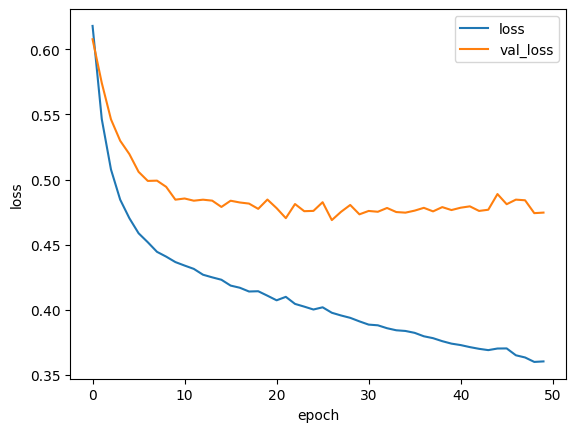

In [17]:
# Loss 그래프 : 오차가 얼마나 줄어드는지 확인

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

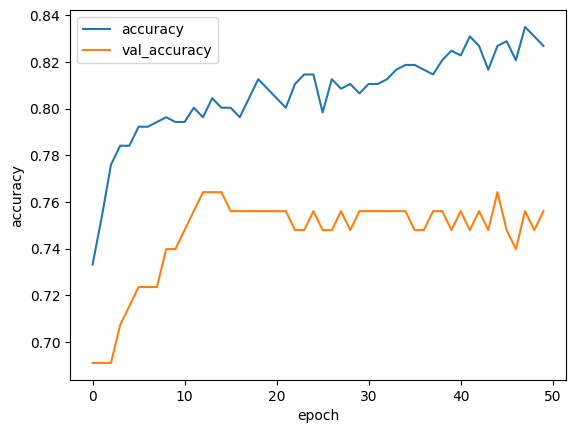

In [18]:
# Accuracy 그래프 : 정답을 얼마나 맞추는지 확인

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

log_clf = LogisticRegression(max_iter=1000)  # 수렴을 위해 반복 횟수 넉넉히
log_clf.fit(X_train, y_train)                # 모델 학습

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [20]:
y_pred_log = log_clf.predict(X_test)
y_proba_log = log_clf.predict_proba(X_test)[:, 1]

In [21]:
acc_log = accuracy_score(y_test, y_pred_log)
print(f"[Logistic Regression] 테스트 정확도: {acc_log:.4f}")

[Logistic Regression] 테스트 정확도: 0.7532


In [22]:
cm_log = confusion_matrix(y_test, y_pred_log)
print("\n[Logistic Regression] 혼동행렬:")
print(cm_log)

print("\n[Logistic Regression] 분류 리포트:")
print(classification_report(y_test, y_pred_log))


[Logistic Regression] 혼동행렬:
[[79 20]
 [18 37]]

[Logistic Regression] 분류 리포트:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [23]:
# (4) AUC (당뇨(1) 클래스에 대한 ROC AUC)
auc_log = roc_auc_score(y_test, y_proba_log)
print(f"[Logistic Regression] ROC AUC: {auc_log:.4f}")

[Logistic Regression] ROC AUC: 0.8195


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# 1) 트리 모델 생성 (깊이 제한을 두는 게 과적합에 유리)
dt_clf = DecisionTreeClassifier(
    max_depth=4,        # 트리 최대 깊이 (필요하면 바꿔봐도 됨)
    random_state=42
)

In [25]:
# 2) 학습
dt_clf.fit(X_train, y_train)

# 3) 예측 (라벨, 확률)
y_pred_dt = dt_clf.predict(X_test)                  # 0 / 1 예측
y_proba_dt = dt_clf.predict_proba(X_test)[:, 1]

In [26]:
# 4) 정확도
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"[Decision Tree] 테스트 정확도: {acc_dt:.4f}")

[Decision Tree] 테스트 정확도: 0.6948


In [27]:
# 5) 혼동행렬 & 리포트
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\n[Decision Tree] 혼동행렬:")
print(cm_dt)

print("\n[Decision Tree] 분류 리포트:")
print(classification_report(y_test, y_pred_dt))


[Decision Tree] 혼동행렬:
[[69 30]
 [17 38]]

[Decision Tree] 분류 리포트:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        99
           1       0.56      0.69      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.72      0.69      0.70       154



In [28]:
# 6) AUC
auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f"[Decision Tree] ROC AUC: {auc_dt:.4f}")

[Decision Tree] ROC AUC: 0.8006
